<h3>Efficient frontier & Maximum Sharpe Ratio Portfolio</h3>

In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
os.chdir(r"C:\Users\mehul\Time_Series_Analysis")

In [3]:
# Aggregating returns from all the currencies in one dataframe
file = ["dash_price.csv","ethereum_classic_price.csv","ethereum_price.csv","litecoin_price.csv",
        "monero_price.csv","nem_price.csv","neo_price.csv","ripple_price.csv","stratis_price.csv"]
col_names = ["dash","ethereum_classic","ethereum","litecoin","monero","nem","neo","ripple","stratis"]
data = pd.read_csv("bitcoin_price.csv",index_col='Date', parse_dates=['Date'])
data.index = pd.DatetimeIndex(data.index.values,freq=data.index.inferred_freq)
data = data.reindex(index=data.index[::-1])
data = data['2016-12-31':] 
data["bitcoin"] = data.Mean.div(data.Mean.shift()).sub(1).mul(100)
data.drop(data.iloc[:,0:7],axis=1,inplace=True)

for i in range(len(file)):
    ret = pd.read_csv(file[i],index_col='Date', parse_dates=['Date'])
    ret.index = pd.DatetimeIndex(ret.index.values,freq=ret.index.inferred_freq)
    ret = ret.reindex(index=ret.index[::-1])
    ret = ret['2016-12-31':]
    ret["Returns"] = ret.Mean.div(ret.Mean.shift()).sub(1).mul(100)
    data[col_names[i]] = ret["Returns"]

__From the data description, we can see that mean return is maximum for neo followed by ripple, But they have highest standard of deviation also. This is consistent with the efficient market hypothesis which says that market is fair therefore, the risk is always proportional to return. Higher the return higher is risk.__

In [4]:
data.dropna(inplace=True)
data.describe()

,bitcoin,dash,ethereum_classic,ethereum,litecoin,monero,nem,neo,ripple,stratis
count,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000
mean,0.675778,1.171175,1.003591,1.300228,1.164263,0.923585,1.496567,2.085287,1.650245,1.513608
std,3.947965,5.888112,6.538256,5.640544,6.596334,5.805302,8.302204,10.079484,9.918467,8.288789
min,-12.842114,-17.485286,-20.686151,-15.432383,-17.100729,-17.401993,-26.441788,-31.238232,-23.493735,-23.771368
25%,-1.433423,-1.869737,-1.837934,-1.344540,-1.973813,-1.925859,-3.069280,-2.572644,-2.076591,-3.452318
50%,0.957033,0.630456,0.353933,0.809532,0.379856,0.492865,0.721701,0.470000,-0.083823,0.502035
75%,2.977128,3.882772,3.151447,3.573031,3.243351,4.116300,4.578609,4.955200,3.088830,5.642406
max,22.121453,29.541930,46.692607,29.119497,46.923506,28.504492,72.580362,93.757030,104.692382,38.516405


__Lets have a look at the graphical representation for Mean Return & Volatility__

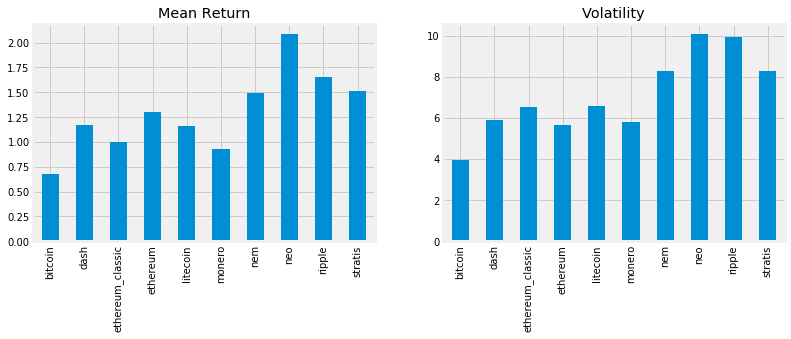

In [14]:
fig = plt.figure(figsize=(12,4))
ax =fig.add_subplot(1,2,1)
data.mean().plot(kind='bar')
plt.title("Mean Return")
ax =fig.add_subplot(1,2,2)
data.std().plot(kind='bar')
plt.title("Volatility")
plt.show()

In [29]:
np.random.seed(42)
num_ports = 6000
all_weights = np.zeros((num_ports,len(data.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)
for x in range(num_ports):
    #weights
    weights = np.array(np.random.random(10))
    weights = weights/np.sum(weights)
            
    #save_weights
    all_weights[x,:] = weights
            
    #Expected Return
    ret_arr[x] = np.sum((data.mean()*weights*252))
            
    #Expected Volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T,np.dot(data.cov()*252,weights)))
            
    #Sharpe ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

__Sharpe Ratio is defined as the ratio of excess return over risk free rate and volatility of the excess return<br></br> 
Sharpe Ratio  = (R - Rf)/sigma<br></br> 
R = Return on the portfolio<br></br>
Rf = Risk free Return which is generally taken as the return on the shortest term US Treasury bill<br></br>
Sigma = standard deviation of the excess return__<br></br>

In [71]:
print(f'Maximum Sharpe Ratio : {sharpe_arr.max()}')
print(f'Maximum Sharpe Ratio Location :{sharpe_arr.argmax()}')
print(f'Maximum Sharpe Ratio Portfolio Return : {ret_arr[sharpe_arr.argmax()]}')
print(f'Maximum Sharpe Ratio Portfolio Volatility : {vol_arr[sharpe_arr.argmax()]}')     
print("Weights Allotted to various Cryptocurrencies")
max_sr = pd.DataFrame(list(zip(data.columns,all_weights[sharpe_arr.argmax(),:])),columns = ['Cryptocurrency Name','Weight Allocated'])
print(max_sr)    

Maximum Sharpe Ratio : 4.7309321314806665
Maximum Sharpe Ratio Location :4608
Maximum Sharpe Ratio Portfolio Return : 344.45053695276687
Maximum Sharpe Ratio Portfolio Volatility : 72.80817550958234
Weights Allotted to various Cryptocurrencies
  Cryptocurrency Name  Weight Allocated
0             bitcoin          0.174870
1                dash          0.201754
2    ethereum_classic          0.024863
3            ethereum          0.132895
4            litecoin          0.000493
5              monero          0.010008
6                 nem          0.058173
7                 neo          0.172763
8              ripple          0.133185
9             stratis          0.090998


__Below is graphical representation of the Allocated Weights in a maximum sharpe ratio portfolio.<br></br>
Maximum weight has been allocated to dash followed by bitcoin<br></br>
Minimum weight has been allocated to litecoin followed by monero__<br></br>

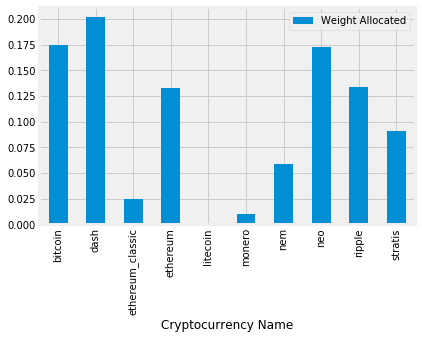

In [73]:
max_sr.plot(x='Cryptocurrency Name',y='Weight Allocated',kind='bar')
plt.show()

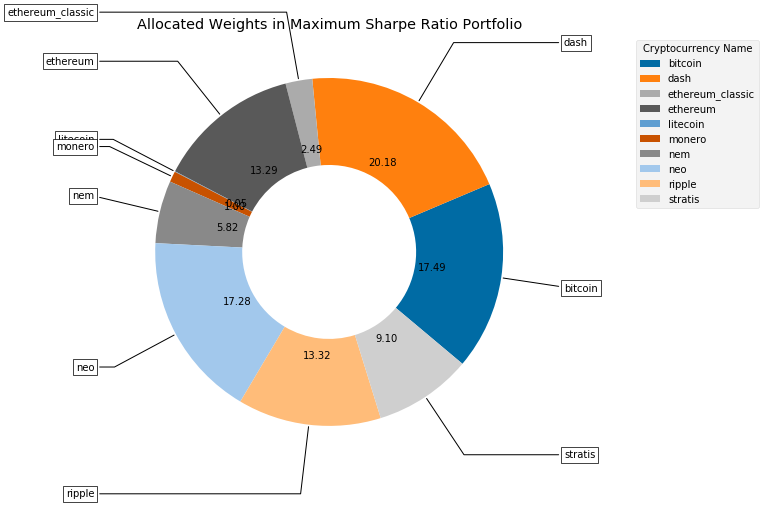

In [113]:
from palettable import tableau

fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))
wedges, texts,pct = ax.pie(max_sr['Weight Allocated'], wedgeprops=dict(width=0.5),autopct = '%1.2f',colors =tableau.ColorBlind_10.hex_colors, startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-",color='black',linewidth=1),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(max_sr["Cryptocurrency Name"][i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
    
ax.legend(wedges,max_sr["Cryptocurrency Name"],title="Cryptocurrency Name",loc="best",bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title("Allocated Weights in Maximum Sharpe Ratio Portfolio")

plt.show()

__Efficient Frontier- If we plot the return vs volatility for all the portfolio, Then efficient frontier consists of all those
portfolios having the minimum volatility(or risk) for a given return.The starting point of the efficient frontier is portfolio having Risk free Return & zero volatility__

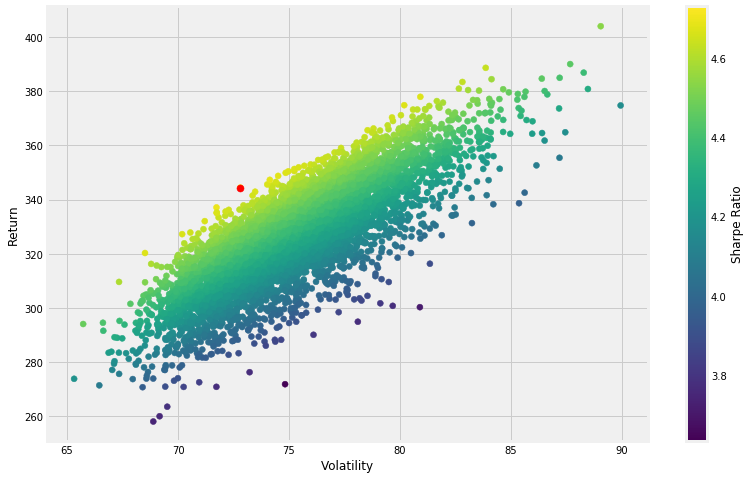

In [37]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel("Volatility")
plt.ylabel("Return")
plt.scatter(vol_arr[sharpe_arr.argmax()],ret_arr[sharpe_arr.argmax()],c='red',s=50)
plt.show()    

In [84]:
from scipy.optimize import minimize
def get_rt_vol(weights):
    weights = np.array(weights)
    ret = np.sum(data.mean()*weights)*252
    vol = np.sqrt(np.dot(weights.T,np.dot(data.cov()*252,weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])
              
def neg_sharpe(weights):
    return get_ret_vol(weights)[2]*-1
        
def check_sum(weights):
    return np.sum(weights)-1
        
def minimize_vol(weights):
    return get_rt_vol(weights)[1]

bounds = ((0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1))
frontier_y = np.linspace(280,400,200)
frontier_x = []
for i in range(len(frontier_y)):
    cons = ({'type':'eq','fun':check_sum},
            {'type':'eq','fun':lambda w: get_rt_vol(w)[0]-frontier_y[i]})
    result = minimize(minimize_vol,all_weights[i,:],method ='SLSQP',bounds=bounds,constraints=cons)
    frontier_x.append(result['fun'])

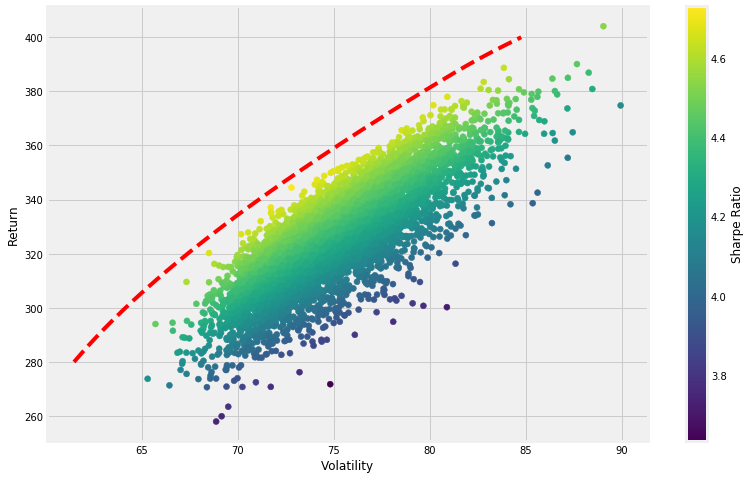

In [85]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel("Volatility")
plt.ylabel("Return")
plt.plot(frontier_x,frontier_y,'r--')
plt.show()            